In [405]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None, "display.max_rows", None)

# Read in csv
houses = pd.read_csv("HousingML/data/train.csv", index_col = "Id")

# Drop Columns
houses = houses.drop(["MiscFeature", "Fence", "PoolArea", "PoolQC", "GarageCond", 
                      "GarageCars", "BsmtFinSF1", "BsmtFinSF2"], axis=1)

# Adjust MSSubClass to string
houses["MSSubClass"] = houses["MSSubClass"].astype('str')

# Convert Alley to Factor
houses["Alley"] = houses["Alley"].map(lambda x: 1 if x is True else 0)

# Bin LotConfig to impute missing LotFrontage
mean_frontage = dict(houses.groupby("LotConfig")["LotFrontage"].mean())
mean_frontage
houses.loc[pd.isna(houses["LotFrontage"]), "LotFrontage"] = houses.loc[pd.isna(houses["LotFrontage"]), "LotConfig"].replace(mean_frontage)
houses = houses.drop("LotConfig", axis = 1)

# Convert Fireplace Quality to Scale
houses["FireplaceQu"] = houses["FireplaceQu"].apply(lambda x: 0 if False else 1 if "Po" else 2 if "Fa" else 3 if "TA" else 4 if "Gd" else 5)

# Convert Exterior Quality and Condition to Scale
houses["ExterQual"] = houses["ExterQual"].apply(lambda x: 0 if "Po" else 1 if "Fa" else 2 if "TA" else 3 if "Gd" else 5)
houses["ExterCond"] = houses["ExterCond"].apply(lambda x: 0 if "Po" else 1 if "Fa" else 2 if "TA" else 3 if "Gd" else 5)

# Convert Basement Quality and Condition to Scale
houses["BsmtQual"] = houses["BsmtQual"].apply(lambda x: 0 if False else 1 if "Po" else 2 if "Fa" else 3 if "TA" else 4 if "Gd" else 5)
houses["BsmtCond"] = houses["BsmtCond"].apply(lambda x: 0 if False else 1 if "Po" else 2 if "Fa" else 3 if "TA" else 4 if "Gd" else 5)
houses["BsmtExposure"] = houses["BsmtExposure"].apply(lambda x: 0 if False else 1 if "No" else 2 if "Mn" else 3 if "Av" else 4)
houses["BsmtFinType1"] = houses["BsmtFinType1"].apply(lambda x: 0 if False else 1 if "Unf" else 2 if "LwQ" else 3 if "Rec" else 4 if "BLQ" else 5 if "ALQ" else 6)
houses["BsmtFinType2"] = houses["BsmtFinType2"].apply(lambda x: 0 if False else 1 if "Unf" else 2 if "LwQ" else 3 if "Rec" else 4 if "BLQ" else 5 if "ALQ" else 6)

# Convert Heating, Kitchen, and Garage Quality and Finish to Scale
houses["HeatingQC"] = houses["HeatingQC"].apply(lambda x: 0 if False else 1 if "Po" else 2 if "Fa" else 3 if "TA" else 4 if "Gd" else 5)
houses["KitchenQual"] = houses["KitchenQual"].apply(lambda x: 0 if False else 1 if "Po" else 2 if "Fa" else 3 if "TA" else 4 if "Gd" else 5)
houses["GarageQual"] = houses["GarageQual"].apply(lambda x: 0 if False else 1 if "Po" else 2 if "Fa" else 3 if "TA" else 4 if "Gd" else 5)
houses["GarageFinish"] = houses["GarageFinish"].apply(lambda x: 0 if False else 1 if "Unf" else 2 if "RFn" else 3)

# Feature Engineer total Porch Area


# Drop Rows with NA (9 total) from Electrical, MasVnrType, and MasVnrArea
houses = houses[~pd.isna(houses["Electrical"])]
houses = houses[~pd.isna(houses["MasVnrType"])]

houses.dtypes
dict(houses.isna().sum())
# houses.head(10)
# houses.shape

{'MSSubClass': 0,
 'MSZoning': 0,
 'LotFrontage': 0,
 'LotArea': 0,
 'Street': 0,
 'Alley': 0,
 'LotShape': 0,
 'LandContour': 0,
 'Utilities': 0,
 'LandSlope': 0,
 'Neighborhood': 0,
 'Condition1': 0,
 'Condition2': 0,
 'BldgType': 0,
 'HouseStyle': 0,
 'OverallQual': 0,
 'OverallCond': 0,
 'YearBuilt': 0,
 'YearRemodAdd': 0,
 'RoofStyle': 0,
 'RoofMatl': 0,
 'Exterior1st': 0,
 'Exterior2nd': 0,
 'MasVnrType': 0,
 'MasVnrArea': 0,
 'ExterQual': 0,
 'ExterCond': 0,
 'Foundation': 0,
 'BsmtQual': 0,
 'BsmtCond': 0,
 'BsmtExposure': 0,
 'BsmtFinType1': 0,
 'BsmtFinType2': 0,
 'BsmtUnfSF': 0,
 'TotalBsmtSF': 0,
 'Heating': 0,
 'HeatingQC': 0,
 'CentralAir': 0,
 'Electrical': 0,
 '1stFlrSF': 0,
 '2ndFlrSF': 0,
 'LowQualFinSF': 0,
 'GrLivArea': 0,
 'BsmtFullBath': 0,
 'BsmtHalfBath': 0,
 'FullBath': 0,
 'HalfBath': 0,
 'BedroomAbvGr': 0,
 'KitchenAbvGr': 0,
 'KitchenQual': 0,
 'TotRmsAbvGrd': 0,
 'Functional': 0,
 'Fireplaces': 0,
 'FireplaceQu': 0,
 'GarageType': 81,
 'GarageYrBlt': 81,
 '

In [372]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split
randomForest = ensemble.RandomForestRegressor()

## Findings:
When the randomforest uses all columns, train score is .9784431341050297 and test score is 0.9109712507382508.

So far the best model results have been using this subset of columns:
        
        ["MSSubClass", "MSZoning", "LotFrontage", "Alley", "Utilities", "Neighborhood", "Condition1", "BldgType",
        "OverallQual", "YearBuilt", "YearRemodAdd", "Exterior1st", "TotalBsmtSF", "Heating", "CentralAir", 
        "1stFlrSF", "2ndFlrSF", "Fireplaces", "FireplaceQu", "KitchenAbvGr", "GarageType", 
        "GarageArea", "GarageQual", "SaleType", "SaleCondition"]
        
        with params = n_estimators=800, max_features=25
        
        train score is 0.9788223251669004
        test score is 0.9103308675663784
        

In [432]:
use_columns = ["MSSubClass", "MSZoning", "LotFrontage", "Alley", "Utilities", "Neighborhood", "Condition1", "BldgType",
              "OverallQual", "YearBuilt", "YearRemodAdd", "Exterior1st", "TotalBsmtSF", "Heating", "CentralAir", 
               "1stFlrSF", "2ndFlrSF", "Fireplaces", "KitchenAbvGr", "FireplaceQu", "GarageType", "GarageArea", "GarageQual", "SaleType", "SaleCondition"]
X = pd.get_dummies(houses[use_columns], drop_first=True, dummy_na=True)
y = houses['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [433]:
randomForest.set_params(random_state=42, n_estimators=800, max_features=25, oob_score=True)
randomForest.fit(X_train, y_train) # fit 
randomForest.score(X_train, y_train) # accuracy #0.9787624083170859

0.9788223251669004

In [434]:
randomForest.score(X_test, y_test) #0.9112301205842435

0.9103308675663784

In [419]:
randomForest.oob_score_ #0.8420239853952032

0.8393755443982529

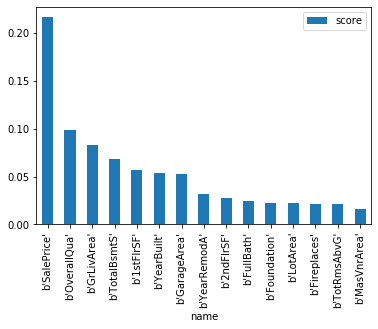

In [415]:
feature_importance = list(zip(X_train.columns, randomForest.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
name, score = zip(*list(feature_sort))
pd.DataFrame({'name':name,'score':score})[:15].plot.bar(x='name', y='score')

In [336]:
from sklearn.model_selection import GridSearchCV
grid_para_forest = [{
    "n_estimators": [250, 500, 1000],
#     "min_samples_leaf": range(1, 10),
    "max_features": np.linspace(start=2, stop=30, num=15, dtype=int),
    "random_state": [42]}]
grid_search_forest = GridSearchCV(randomForest, grid_para_forest, error_score = "raise", refit = True, scoring='accuracy', cv=5, n_jobs=-1)
# grid_search_forest.best_params_
# grid_search_forest.best_score_
grid_search_forest

GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features=25,
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=910, n_jobs=None,
                                             oob_score=True, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [327]:
n_trees_range = range(10, 1000, 100)  # OOB score will warning if too few trees
train_error2 = []
test_error2 = []
oob_error = []

for n_trees in n_trees_range:
#     for n_feat in n_feat_range:
    randomForest.set_params(n_estimators=n_trees, random_state=42, oob_score=True)
    randomForest.fit(X_train, y_train)
    train_error2.append(1 - randomForest.score(X_train, y_train))
    test_error2.append(1 - randomForest.score(X_test, y_test))
    oob_error.append(1 - randomForest.oob_score_)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


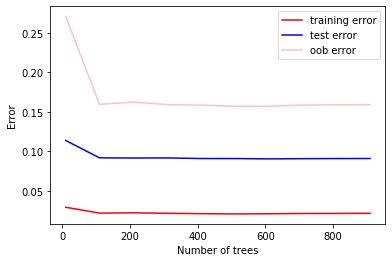

In [328]:
import matplotlib.pyplot as plt
plt.plot(n_trees_range, train_error2, c='red', label='training error')
plt.plot(n_trees_range, test_error2, c='blue', label='test error')
plt.plot(n_trees_range, oob_error, c='pink', label='oob error')
plt.ylabel('Error')
plt.xlabel('Number of trees')
plt.legend()
plt.show()

In [245]:
# houses[(houses['CentralAir'] == "N")][["SalePrice", "YearBuilt"]].plot.scatter(x="YearBuilt", y="SalePrice")
# houses[(houses['Alley'] == "Grvl")].plot.bar()#[["SalePrice", "YearBuilt"]].plot.scatter(x="YearBuilt", y="SalePrice")

In [246]:
# houses['CentralAir'].hist()

In [247]:
# houses.groupby(["BsmtFinType1", "MSSubClass"])[["MSSubClass"]].count().plot.bar(figsize = (15, 5))

In [248]:
# houses[(houses["PoolArea"] != 0)]["SalePrice"]

In [249]:
# houses["SalePrice"].mean()

In [250]:
# gargqual = houses.replace(np.nan, "NA").groupby(["GarageQual"])["GarageQual"].count()
# gargfin = houses.replace(np.nan, "NA").groupby(["GarageFinish"])["GarageFinish"].count()
# plt.bar(x=gargqual.index, height=gargqual.values)

In [251]:
# houses.groupby("MasVnrType")[["MasVnrType"]].count().plot.bar()
# houses["AvgMasArea"] = houses.cut("MasVnrArea", 20)
# houses[["MasVnrArea", "SalePrice"]].plot.scatter(x="MasVnrArea" , y="SalePrice" )

In [252]:
# houses["YearBuilt"].sort_values(ascending=False)